In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from logger import MetricLogger
from agent import Mario
import pygame, sys
from game import Game
from gymEnv import MarioEnv

pygame 2.1.2 (SDL 2.0.18, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
useAgent = True
nbActions=3
pygame.init()
env = MarioEnv(useAgent,nbActions,levelnumber=1)

In [3]:
useAgent = True
nbActions=3
pygame.init()
env = MarioEnv(useAgent,nbActions,levelnumber=1)

use_cuda = torch.cuda.is_available()
print(f"Using CUDA: {use_cuda}")
print()

mario = Mario(state_dim=(1, 84, 84), action_dim=env.action_space.n)

logger = MetricLogger()    
        
episodes = 300
for e in range(episodes):

    state = env.reset()
    test = state.shape
    #print()
    # Play the game!
    while True:
        
        #print(state.shape,end="    ")
        # Run agent on the state
        action = mario.act(state)
        # Agent performs action
        next_state, reward, done, info = env.step(action)
        # Remember
        mario.cache(state, next_state, action, reward, done)

        # Learn
        q, loss = mario.learn()

        # Logging
        logger.log_step(reward, loss, q)

        # Update state
        state = next_state
        env.render()
        pygame.display.update()
        # Check if end of game
        if done:
            break

    logger.log_episode()
    if e % 10 == 0:
        logger.record(episode=e, epsilon=mario.exploration_rate, step=mario.curr_step)
    
pygame.quit()

Using CUDA: False

Episode 0 - Step 57 - Epsilon 0.9805237679540135 - Mean Reward 772583.789 - Mean Length 57.0 - Mean Loss 0.0 - Mean Q Value 0.0 - Time Delta 2.068 - Time 2022-03-22T03:12:49
Episode 10 - Step 493 - Epsilon 0.8435683520666404 - Mean Reward 607900.766 - Mean Length 44.818 - Mean Loss 0.0 - Mean Q Value 0.0 - Time Delta 18.014 - Time 2022-03-22T03:13:07
Episode 20 - Step 976 - Epsilon 0.7140672755921728 - Mean Reward 634474.366 - Mean Length 46.476 - Mean Loss 0.0 - Mean Q Value 0.0 - Time Delta 18.539 - Time 2022-03-22T03:13:26
Episode 30 - Step 1421 - Epsilon 0.6124245139321118 - Mean Reward 627803.624 - Mean Length 45.839 - Mean Loss 0.0 - Mean Q Value 0.0 - Time Delta 18.324 - Time 2022-03-22T03:13:44
Episode 40 - Step 1861 - Epsilon 0.5261569228920633 - Mean Reward 623748.356 - Mean Length 45.39 - Mean Loss 0.0 - Mean Q Value 0.0 - Time Delta 20.005 - Time 2022-03-22T03:14:04
Episode 50 - Step 2245 - Epsilon 0.4608610753921049 - Mean Reward 605825.828 - Mean Length

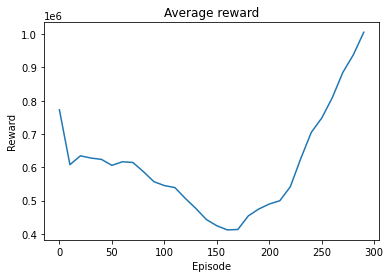

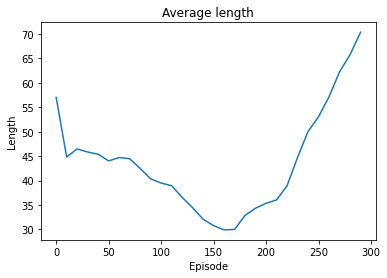

In [4]:
plt.plot(np.array(range(30))*10,logger.moving_avg_ep_rewards)
plt.title("Average reward")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()
plt.plot(np.array(range(30))*10,logger.moving_avg_ep_lengths)
plt.title("Average length")
plt.xlabel("Episode")
plt.ylabel("Length")
plt.show()

The average reward shows that the agent gets consistently closer and closer to the goal, or even touches the goal.
The average length shows that the agent goes further into the level without dieing, the peak shows that it overshoots and dies after the goal but it diminishes and stops on the goal.

#### Precision level

On this level, the agent needs to jump and stop moving during the jump to reduce the length of the jump and land on the platforms

In [10]:
pygame.init()
useAgent = True
nbActions=3
pygame.init()
env = MarioEnv(useAgent,nbActions,levelnumber=2)

use_cuda = torch.cuda.is_available()
print(f"Using CUDA: {use_cuda}")
print()

mario = Mario(state_dim=(1, 84, 84), action_dim=env.action_space.n)

logger = MetricLogger()    
        
episodes = 400
for e in range(episodes):

    state = env.reset()
    test = state.shape
    #print()
    # Play the game!
    while True:
        
        #print(state.shape,end="    ")
        # Run agent on the state
        action = mario.act(state)
        # Agent performs action
        next_state, reward, done, info = env.step(action)
        # Remember
        mario.cache(state, next_state, action, reward, done)

        # Learn
        q, loss = mario.learn()

        # Logging
        logger.log_step(reward, loss, q)

        # Update state
        state = next_state
        env.render()
        pygame.display.update()
        # Check if end of game
        if done:
            break

    logger.log_episode()
    if e % 10 == 0:
        logger.record(episode=e, epsilon=mario.exploration_rate, step=mario.curr_step)
    
pygame.quit()

Using CUDA: False

Episode 0 - Step 29 - Epsilon 0.9900431744394126 - Mean Reward 400476.001 - Mean Length 29.0 - Mean Loss 0.0 - Mean Q Value 0.0 - Time Delta 1.1 - Time 2022-03-22T03:45:05
Episode 10 - Step 384 - Epsilon 0.875900430728814 - Mean Reward 471572.522 - Mean Length 34.909 - Mean Loss 0.0 - Mean Q Value 0.0 - Time Delta 13.113 - Time 2022-03-22T03:45:18
Episode 20 - Step 803 - Epsilon 0.7579917331515647 - Mean Reward 519651.162 - Mean Length 38.238 - Mean Loss 0.0 - Mean Q Value 0.0 - Time Delta 16.687 - Time 2022-03-22T03:45:35
Episode 30 - Step 1087 - Epsilon 0.6872345006026239 - Mean Reward 476785.129 - Mean Length 35.065 - Mean Loss 0.0 - Mean Q Value 0.0 - Time Delta 12.591 - Time 2022-03-22T03:45:47
Episode 40 - Step 1406 - Epsilon 0.6156025751785197 - Mean Reward 466783.865 - Mean Length 34.293 - Mean Loss 0.0 - Mean Q Value 0.0 - Time Delta 14.485 - Time 2022-03-22T03:46:02
Episode 50 - Step 1781 - Epsilon 0.5408836888426999 - Mean Reward 476642.756 - Mean Length 3

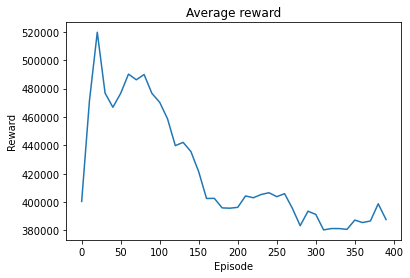

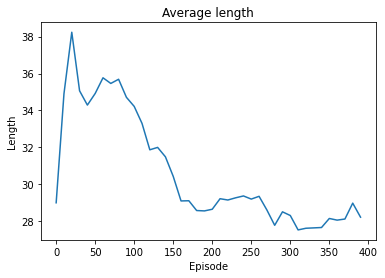

In [11]:
plt.plot(np.array(range(int(episodes/10)))*10,logger.moving_avg_ep_rewards)
plt.title("Average reward")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()
plt.plot(np.array(range(int(episodes/10)))*10,logger.moving_avg_ep_lengths)
plt.title("Average length")
plt.xlabel("Episode")
plt.ylabel("Length")
plt.show()

The model has troubles with the precision level.

#### Button Level

This level has a platform with a button that needs to be pushed to access the end

In [4]:
pygame.init()
useAgent = True
nbActions=3
pygame.init()
env = MarioEnv(useAgent,nbActions,levelnumber=3)

use_cuda = torch.cuda.is_available()
print(f"Using CUDA: {use_cuda}")
print()

mario = Mario(state_dim=(1, 84, 84), action_dim=env.action_space.n,lrd=0.999975)

logger = MetricLogger()    
        
episodes = 300
for e in range(episodes):

    state = env.reset()
    test = state.shape
    #print()
    # Play the game!
    while True:
        
        #print(state.shape,end="    ")
        # Run agent on the state
        action = mario.act(state)
        # Agent performs action
        next_state, reward, done, info = env.step(action)
        # Remember
        mario.cache(state, next_state, action, reward, done)

        # Learn
        q, loss = mario.learn()

        # Logging
        logger.log_step(reward, loss, q)

        # Update state
        state = next_state
        env.render()
        pygame.display.update()
        # Check if end of game
        if done:
            break

    logger.log_episode()
    if e % 10 == 0:
        logger.record(episode=e, epsilon=mario.exploration_rate, step=mario.curr_step)
    
pygame.quit()

Using CUDA: False

Episode 0 - Step 144 - Epsilon 0.9964064273919485 - Mean Reward 1956935.504 - Mean Length 144.0 - Mean Loss 0.0 - Mean Q Value 0.0 - Time Delta 7.138 - 
Episode 10 - Step 1085 - Epsilon 0.9732392489786711 - Mean Reward 1350346.18 - Mean Length 98.636 - Mean Loss 0.0 - Mean Q Value 0.0 - Time Delta 31.827 - 
Episode 20 - Step 2050 - Epsilon 0.9500405219283775 - Mean Reward 1338821.8 - Mean Length 97.619 - Mean Loss 0.0 - Mean Q Value 0.0 - Time Delta 34.995 - 
Episode 30 - Step 3428 - Epsilon 0.9178685675016021 - Mean Reward 1480639.845 - Mean Length 110.581 - Mean Loss 0.0 - Mean Q Value 0.0 - Time Delta 49.107 - 
Episode 40 - Step 5229 - Epsilon 0.877457608605954 - Mean Reward 1674271.319 - Mean Length 127.537 - Mean Loss 476.85 - Mean Q Value 193.808 - Time Delta 72.298 - 
Episode 50 - Step 6477 - Epsilon 0.8505032685200001 - Mean Reward 1670005.556 - Mean Length 127.0 - Mean Loss 563.505 - Mean Q Value 2833.613 - Time Delta 75.713 - 
Episode 60 - Step 7562 - Epsil

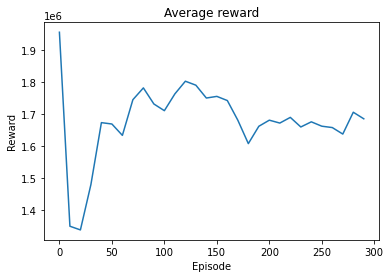

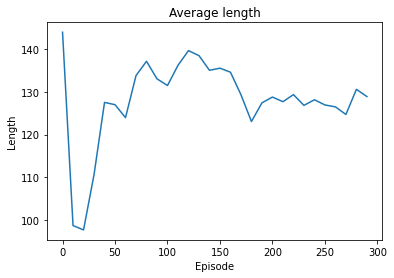

In [5]:
plt.plot(np.array(range(int(episodes/10)))*10,logger.moving_avg_ep_rewards)
plt.title("Average reward")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()
plt.plot(np.array(range(int(episodes/10)))*10,logger.moving_avg_ep_lengths)
plt.title("Average length")
plt.xlabel("Episode")
plt.ylabel("Length")
plt.show()